# Task 1: Hypothesis testing and confidence intervals

Conduct hypothesis tests and calculate confidence intervals for the Heart Disease UCI dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.dropna(subset=['chol', 'num'], inplace=True)
# df.num.isna().sum()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        890 non-null    int64  
 1   age       890 non-null    int64  
 2   sex       890 non-null    object 
 3   dataset   890 non-null    object 
 4   cp        890 non-null    object 
 5   trestbps  834 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       800 non-null    object 
 8   restecg   888 non-null    object 
 9   thalch    838 non-null    float64
 10  exang     838 non-null    object 
 11  oldpeak   831 non-null    float64
 12  slope     603 non-null    object 
 13  ca        308 non-null    float64
 14  thal      432 non-null    object 
 15  num       890 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 118.2+ KB


In [5]:
df.dataset.value_counts()

Cleveland        304
Hungary          270
VA Long Beach    193
Switzerland      123
Name: dataset, dtype: int64

In [6]:
df.num.value_counts()

0    392
1    258
2    107
3    106
4     27
Name: num, dtype: int64

In [7]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     56
chol          0
fbs          90
restecg       2
thalch       52
exang        52
oldpeak      59
slope       287
ca          582
thal        458
num           0
dtype: int64

In [8]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,890.000000,890.000000,834.000000,890.000000,838.000000,831.000000,308.000000,890.000000
mean,458.016854,53.580899,132.089928,199.130337,137.539379,0.889290,0.678571,1.008989
std,267.339571,9.389502,19.077093,110.780810,25.989709,1.095398,0.936378,1.145210
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,223.250000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,461.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.750000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
df.corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.230532,0.053213,-0.376936,-0.470599,0.043070,0.068357,0.267503
age,0.230532,1.000000,0.253467,-0.086234,-0.360682,0.252412,0.372018,0.329766
trestbps,0.053213,0.253467,1.000000,0.092853,-0.114104,0.170562,0.094925,0.128628
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.470599,-0.360682,-0.114104,0.236121,1.000000,-0.151671,-0.265275,-0.371710
oldpeak,0.043070,0.252412,0.170562,0.047734,-0.151671,1.000000,0.280301,0.434298
ca,0.068357,0.372018,0.094925,0.051606,-0.265275,0.280301,1.000000,0.515338
num,0.267503,0.329766,0.128628,-0.231547,-0.371710,0.434298,0.515338,1.000000


<Axes: >

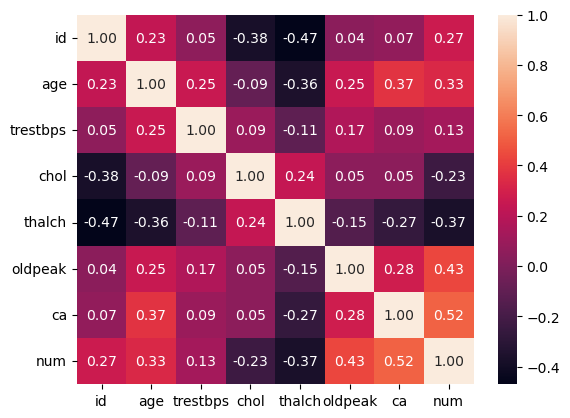

In [10]:
correlations = df.corr()

sns.heatmap(correlations, annot=True, fmt=".2f")

In [11]:
# dropping unnecessary
df.drop(['id'], axis='columns', inplace=True)

In [12]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
pd.crosstab(df.num, df.sex)

sex,Female,Male
num,,
0,137,255
1,30,228
2,10,97
3,8,98
4,2,25


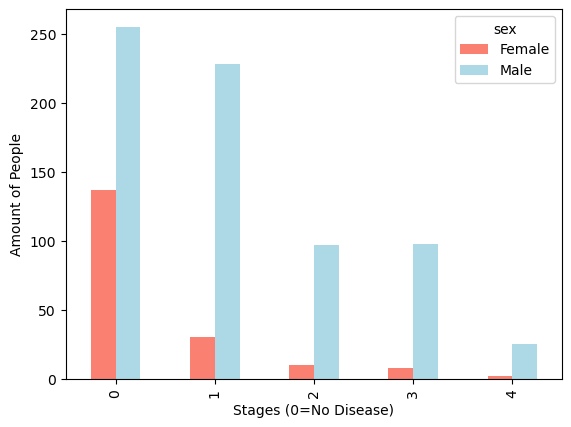

In [14]:
pd.crosstab(df.num, df.sex).plot(kind="bar", color=['salmon', 'lightblue'])
plt.xlabel("Stages (0=No Disease)")
plt.ylabel("Amount of People")
plt.show()

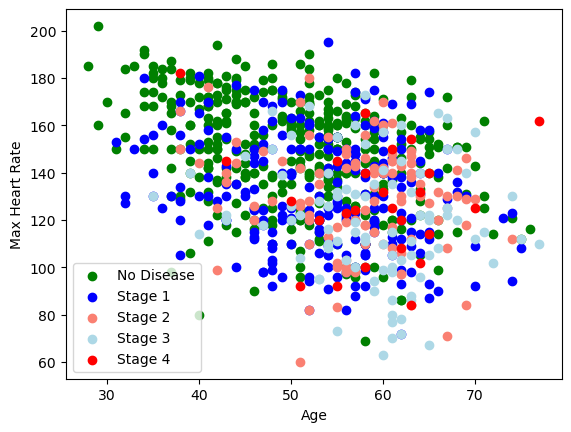

In [15]:
# Compare Age vs max Heart Rate(thalch)

plt.scatter(df.age[df.num==0], df.thalch[df.num==0], c='green')
plt.scatter(df.age[df.num==1], df.thalch[df.num==1], c='blue')
plt.scatter(df.age[df.num==2], df.thalch[df.num==2], c='salmon')
plt.scatter(df.age[df.num==3], df.thalch[df.num==3], c='lightblue')
plt.scatter(df.age[df.num==4], df.thalch[df.num==4], c='red')

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.show()

In [16]:
# Heart Disease per chest pain
pd.crosstab(df.cp, df.num)

num,0,1,2,3,4
cp,,,,,
asymptomatic,102,190,87,82,23
atypical angina,140,19,2,3,0
non-anginal,124,37,14,18,3
typical angina,26,12,4,3,1


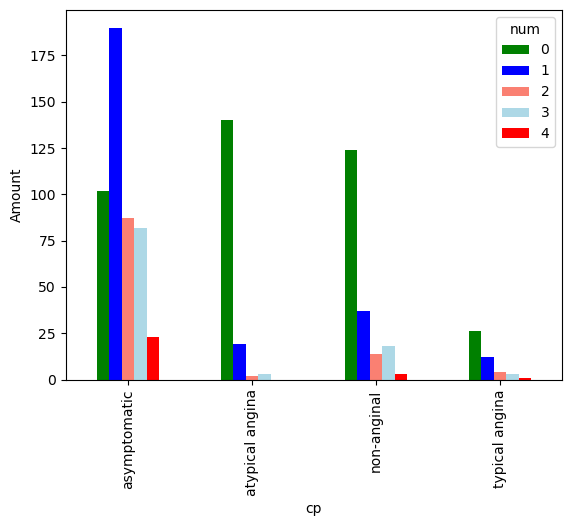

In [17]:
pd.crosstab(df.cp, df.num).plot(kind="bar", color=['green','blue','salmon', 'lightblue', 'red'])
plt.ylabel("Amount")
plt.show()

In [18]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


**Null Hypothesis (H0):** There is no significant difference in cholesterol levels between patients with and without heart disease.

**Alternative Hypothesis (H1):** There is a significant difference in cholesterol levels between patients with and without heart disease.

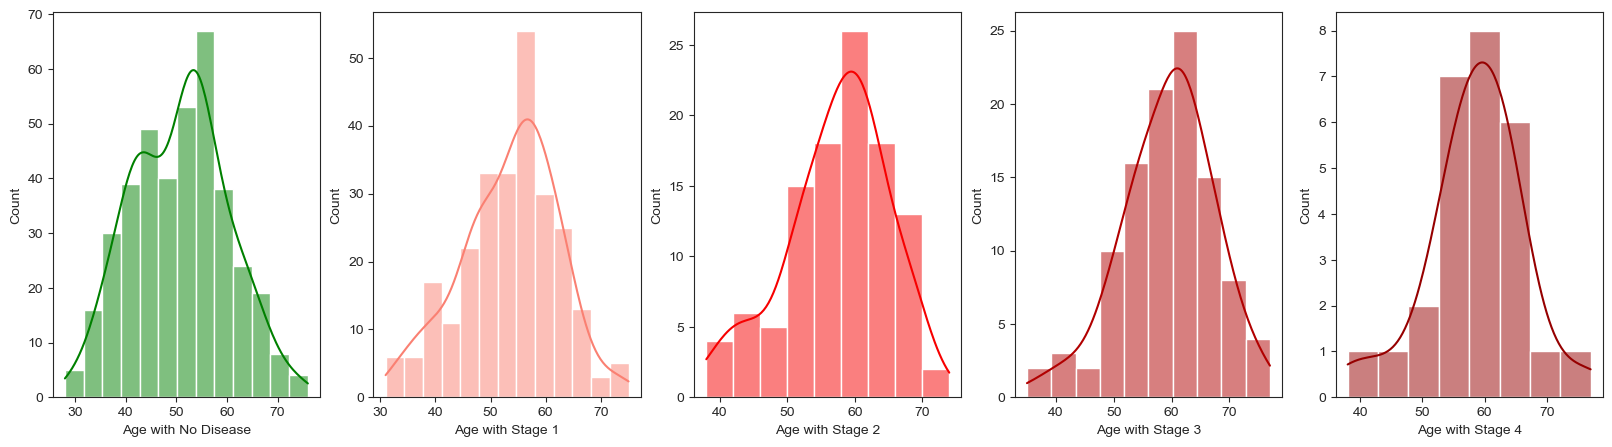

In [79]:
age_heart_disease = df.groupby("num")['age']

fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(1, 5, figsize=(20, 5))

ax = sns.histplot(age_heart_disease.get_group(0), kde=True, color='green', ax=axis1)
ax.set(xlabel="Age with No Disease")
ax = sns.histplot(age_heart_disease.get_group(1), kde=True, color='salmon', ax=axis2)
ax.set(xlabel="Age with Stage 1")
ax = sns.histplot(age_heart_disease.get_group(2), kde=True, color='#F70000', ax=axis3)
ax.set(xlabel="Age with Stage 2")
ax = sns.histplot(age_heart_disease.get_group(3), kde=True, color='#B10000', ax=axis4)
ax.set(xlabel="Age with Stage 3")
ax = sns.histplot(age_heart_disease.get_group(4), kde=True, color='#960000', ax=axis5)
ax.set(xlabel="Age with Stage 4")

plt.show()

In [80]:
# Hypothesis Testing
ages_mean = df.groupby("num")['age'].mean()
ages_std = df.groupby("num")['age'].std()

stages_df = pd.DataFrame({'Stage':[0,1,2,3,4], 'Age Mean': ages_mean.values, 'Age Std': ages_std.values,
                          'Sample Size':[ len(df.age[df.num==0]), len(df.age[df.num==1]), len(df.age[df.num==2]),
                                        len(df.age[df.num==3]), len(df.age[df.num==4]) ] })
stages_df

,Stage,Age Mean,Age Std,Sample Size
0,0,50.704082,9.507525,392
1,1,53.511628,8.755757,258
2,2,57.336449,7.650310,107
3,3,59.320755,7.952894,106
4,4,58.592593,7.747254,27


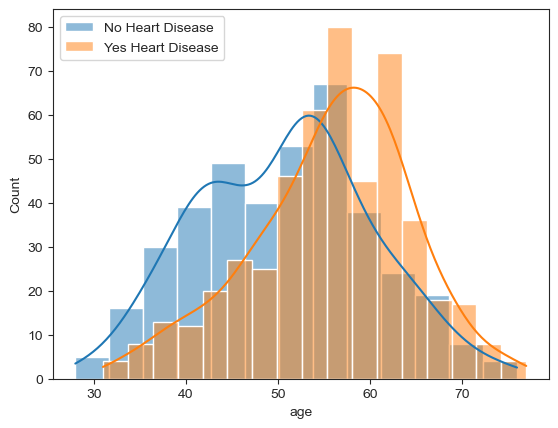

In [103]:
# Population Density Function of Age

sns.histplot(age_heart_disease.get_group(0), label='No Heart Disease', kde=True)
sns.histplot(pd.concat([age_heart_disease.get_group(1),
                        age_heart_disease.get_group(2),
                       age_heart_disease.get_group(3),
                       age_heart_disease.get_group(4)]), label='Yes Heart Disease', kde=True)
plt.legend()
plt.show()

# we can observe that the distribution of the age of the person who doesn't have heart disease 
# shifted downward and to the left of those who have heart disease.

Since we want to compare the cholesterol levels (numerical variable) between two groups (patients with and without heart disease), we will use an independent t-test.

In [104]:
from scipy.stats import ttest_ind

noheart_disease = df[df.num == 0]['chol']
heart_disease = df[df.num > 0]['chol']

# perform independent t-test
t_stat, p_value = ttest_ind(heart_disease, noheart_disease)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis. There is a significant difference in cholesterol levels.")
else:
    print("Fail to Reject Null Hypothesis. There is no significant difference in cholesterol levels.")


t-statistic: -7.061510014417096
p-value: 3.323201042049721e-12
Reject Null Hypothesis. There is a significant difference in cholesterol levels.


In [119]:
# Confidence Interval
# confidence intervals for the 'chol' (cholesterol levels) and 'thalach' (maximum heart rate achieved) variables
import math

columns = df[['thalch', 'chol']]
columns_mean = columns.mean()
columns_std = columns.std()

columns_standard_error = columns_std/len(columns)
columns_margin_error = columns_standard_error/2

confidence_level = 0.95

upper_bound = columns_mean + confidence_level * (columns_std / math.sqrt(10))
lower_bound = columns_mean - confidence_level * (columns_std / math.sqrt(10))

confidence_intervals = pd.DataFrame({
    'Sample Size': columns.count(),
    'Sample Mean': columns_mean,
    'Standard Error': columns_standard_error,
    'Margin of Error': columns_margin_error,
    'Lower Bound (95% CI)': lower_bound,
    'Upper Bound (95% CI)': upper_bound
})

confidence_intervals

,Sample Size,Sample Mean,Standard Error,Margin of Error,Lower Bound (95% CI),Upper Bound (95% CI)
thalch,838,137.539379,0.029202,0.014601,129.731645,145.347114
chol,890,199.130337,0.124473,0.062236,165.849967,232.410707
